In [1]:
!pip install Models

You are using pip version 18.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
from Models.functions.datasets import loadTrainTest

In [3]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [4]:
def get_avg(histories, his_key):
    tmp = []
    for history in histories:
        tmp.append(history[his_key][np.argmin(history['val_loss'])])
    return np.mean(tmp)

def train_val_metrics(histories):
    print('Training: \t%0.4f loss / %0.4f acc' % (get_avg(histories, 'loss'), get_avg(histories, 'acc')))
    print('Validation: \t%0.4f loss / %0.4f acc' % (get_avg(histories, 'val_loss'), get_avg(histories, 'val_acc')))

In [5]:
import matplotlib.pyplot as plt
def plot_history(history):


    loss_list = [s for s in history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.keys() if 'loss' in s and 'val' in s]

    acc_list = [s for s in history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.keys() if 'acc' in s and 'val' in s]

    if len(loss_list) == 0:
        print('Loss is missing in history')

    ## As loss always exists
    epochs = range(1,len(history[loss_list[0]]) + 1)
    
    plt.figure().set_size_inches(12, 4)
    plt.subplot(1,2,1)
    ## Loss    
    for l in loss_list:
        plt.plot(epochs, history[l], 'g', label='Erro de treinamento (' + str(str(format(history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history[l], 'b', label='Erro de validação (' + str(str(format(history[l][-1],'.5f'))+')'))

    plt.title('Erro')
    plt.xlabel('Épocas')
    plt.ylabel('Erro')
    plt.legend()
    
    #plt.gcf().clear()

    ## F2
    plt.subplot(1,2,2)    
    for l in acc_list:
        plt.plot(epochs, history[l], 'g', label='Acurácia de treinamento (' + str(format(history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history[l], 'b', label='Acurácia de validação (' + str(format(history[l][-1],'.5f'))+')')

    plt.title('Acurácia')
    plt.xlabel('Épocas')
    plt.ylabel('Acurácia')
    plt.legend()
    plt.tight_layout()

    plt.show()


3


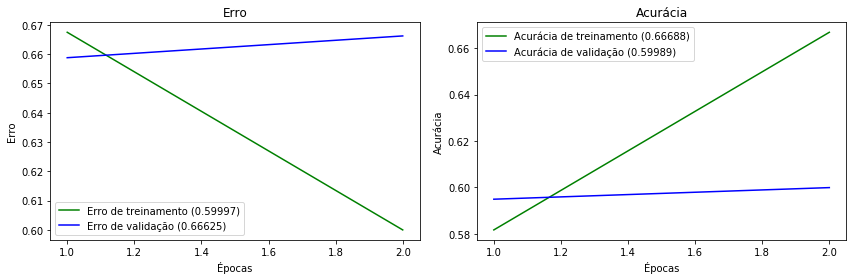

Training: 	0.6683 loss / 0.5819 acc
Validation: 	0.6569 loss / 0.5970 acc


In [6]:
with open('./Reports_grid/gender/pan13_en/histories.pkl','rb') as f:
    h = pickle.load(f)
    histories = np.array(h)
    print(len(histories))
    plot_history(histories[0])
    #plot_history(histories[1])
    train_val_metrics(histories)
    #plot_history(histories[2])

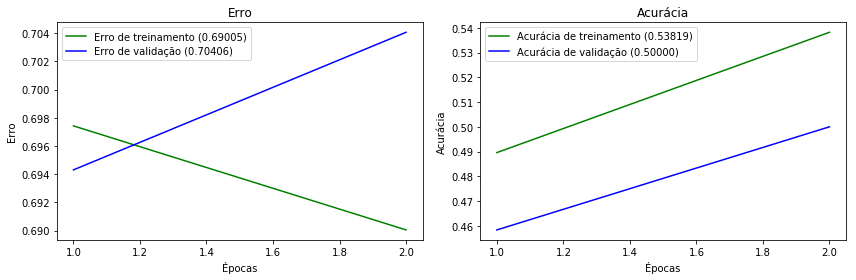

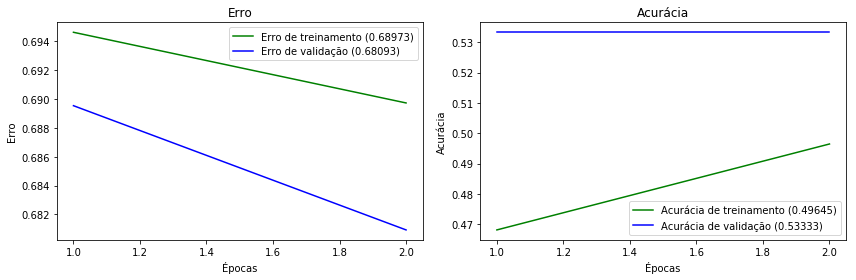

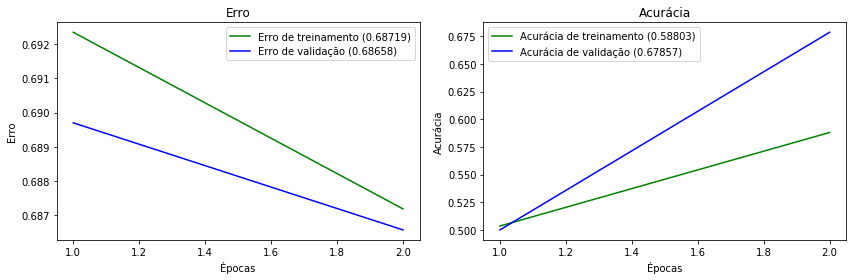

In [7]:
with open('./Reports_grid/it/brmoral_pt/histories.pkl','rb') as f:
    h = pickle.load(f)
    histories = np.array(h)
    plot_history(histories[0])
    plot_history(histories[1])
    plot_history(histories[2])

In [8]:
!pip install scipy

You are using pip version 18.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [9]:
from Models.functions.datasets import loadTrainTest

In [26]:
#pan13__grid.csv
import pandas as pd
import ast

def getReports(dataset_name, sort=False, task=None):
    #params_keys = ['dropout_rate', 'embedding_dim', 'max_seq_length', 'strides', 'features_maps', 'epochs', 'batch_size', 'max_num_words', 'kernel_size']
    params_keys = ['dropout_rate','units', 'embedding_dim','lr','optimizer']
    def split_params(x, key):
        x = ast.literal_eval(x)
        return x[key] if key in x else 0

    rp = pd.read_csv('./Grid/'+dataset_name+'__grid.csv')
    
    for p in params_keys:    
        rp[p] = rp['params'].apply( split_params, key=p)
    rp = rp.drop(['params'],axis=1)
    
    rp = rp.filter(['dataset','task','lang','f1','loss','val_loss', 'units','lr','optimizer','embedding_dim','tunning','dropout_rate'])
    if task != None:
        rp = rp[(rp['task'] == task)]
    if sort == True:
        rp = rp.sort_values(['f1'], ascending=False)
    return rp[:5]

### PAN AUTHOR PROFILING TASK RESULTS
#### Gender: 0.59 / Age: 0.64

In [27]:
getReports('pan13', sort=True, task='gender')[:5]

,dataset,task,lang,f1,loss,val_loss,units,lr,optimizer,embedding_dim,tunning,dropout_rate
122,pan13,gender,es,0.647167,0.648858,0.623869,0,0,None,100,lstm lstm attention,0.2
121,pan13,gender,en,0.603737,0.668312,0.656876,0,0,None,100,lstm lstm attention,0.2
4,pan13,gender,en,0.515005,0.694807,0.690842,0,0,None,100,test channels,0.2
11,pan13,gender,en,0.509470,0.691336,0.691297,0,0,None,100,test channels,0.2
17,pan13,gender,en,0.507661,0.694685,0.684922,0,0,None,100,test channels,0.2


In [17]:
getReports('pan13', sort=True, task='age')[:5]

,dataset,task,lang,f1,loss,val_loss,tunning
124,pan13,age,es,0.665298,0.766275,0.675997,lstm lstm attention
119,pan13,age,en,0.661634,0.755226,0.720119,lstm alstm attention
123,pan13,age,en,0.656656,0.712718,0.722855,lstm lstm attention
120,pan13,age,en,0.655232,0.753669,0.718869,lstm alstm attention
118,pan13,age,en,0.627492,0.707284,0.724197,lstm alstm attention


### BRMORAL Baseline1 results
#### Gender: 0.628 / Age: 0.404 / Religion: 0.406 / Education: 0.402 / TI: 0.63 / Politics: 0.49

In [ ]:
getReports('esic', sort=True, task='gender')[:5]

In [ ]:
getReports('esic', sort=True, task='age')[:5]

In [ ]:
getReports('esic', sort=True, task='education')[:5]

In [ ]:
getReports('esic', sort=True, task='city')[:5]

## SMS

In [ ]:
getReports('smscorpus', sort=True, task='gender')[:5]

In [ ]:
getReports('smscorpus', sort=True, task='age')[:5]

In [46]:
!ls Reports_Grid

ls: cannot access 'Reports_Grid': No such file or directory


In [ ]:
getReports('enblog', sort=True, task='gender')

In [ ]:
getReports('enblog', sort=True, task='age')

### e-Sic RESULTS

In [ ]:
getReports('esic', sort=True, task='education')

In [ ]:
getReports('esic', sort=True, task='profession')

In [ ]:
getReports('esic', sort=True, task='region')

In [ ]:
getReports('esic', sort=True, task='age')

In [ ]:
getReports('esic', sort=True, task='gender')

In [ ]:
getReports('esic', sort=True, task='city')

### SMS

In [ ]:
getReports('smscorpus', sort=True, task='gender')

In [ ]:
getReports('smscorpus', sort=True, task='age')

### BRBlogSet

In [28]:
getReports('brblogset', sort=True, task='gender')

,dataset,task,lang,f1,loss,val_loss,units,lr,optimizer,embedding_dim,tunning,dropout_rate
17,brblogset,gender,pt,0.732704,0.491263,0.547085,128,0.0,None,50,lstm lstm attention,0.2
18,brblogset,gender,pt,0.726109,0.608671,0.657071,128,0.0,None,100,lstm lstm attention,0.2
0,brblogset,gender,pt,0.725634,0.445453,0.521285,0,0.0,None,100,lstm alstm attention,0.2
15,brblogset,gender,pt,0.708887,0.516152,0.606929,32,0.0,None,50,lstm lstm attention,0.2
13,brblogset,gender,pt,0.701398,0.422187,0.586465,12,0.0,None,50,lstm lstm attention,0.2


In [29]:
getReports('brblogset', sort=True, task='age')

,dataset,task,lang,f1,loss,val_loss,units,lr,optimizer,embedding_dim,tunning,dropout_rate
1,brblogset,age,pt,0.449014,1.017489,1.049236,0,0.0,None,100,lstm alstm attention,0.2
26,brblogset,age,pt,0.437816,1.065795,1.079369,128,0.0,None,100,lstm lstm attention,0.2
24,brblogset,age,pt,0.434942,1.057811,1.055558,32,0.0,None,100,lstm lstm attention,0.2
23,brblogset,age,pt,0.415545,1.096250,1.084351,32,0.0,None,50,lstm lstm attention,0.2
2,brblogset,age,pt,0.414243,1.081211,1.082596,0,0.0,None,100,lstm alstm attention,0.2


In [30]:
getReports('brblogset', sort=True, task='education')

,dataset,task,lang,f1,loss,val_loss,units,lr,optimizer,embedding_dim,tunning,dropout_rate
33,brblogset,education,pt,0.357057,1.309964,1.338410,128,0.00000,None,50,lstm lstm attention,0.2
53,brblogset,education,pt,0.346355,1.356976,1.372547,128,0.00010,rmsprop,100,dot => multiply,0.1
51,brblogset,education,pt,0.340261,1.348005,1.358521,128,0.00100,rmsprop,100,dropout 0.5,0.1
37,brblogset,education,pt,0.340140,1.364272,1.377196,32,0.00010,rmsprop,50,1x optmizers,0.2
42,brblogset,education,pt,0.337182,1.299617,1.332107,32,0.00001,adam,50,1x optmizers,0.2
